# The Machine Learning Process
__MATH 3480__ - Dr. Michael Olson


Before everything else, understand the problem



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 1 - Obtain and Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
X = np.loadtxt('/content/drive/MyDrive/School/Classes/3480_MachineLearning/LecturePrograms/data/X.txt')
y = np.loadtxt('/content/drive/MyDrive/School/Classes/3480_MachineLearning/LecturePrograms/data/y.txt')

df = pd.DataFrame(
    {'data':X, 'target':y}
    )

In [5]:
df

,data,target
0,-0.752759,1.617611
1,2.704286,8.061859
2,1.391964,4.452506
3,0.591951,0.779585
4,-2.063888,1.846257
...,...,...
95,-0.037226,1.147656
96,0.136397,2.068597
97,-0.434754,2.000904
98,-2.847485,3.483292


### Step 2 - Clean the Data

In [6]:
# What does the data look like?
df.shape

(100, 2)

1  ---  3


<Axes: >

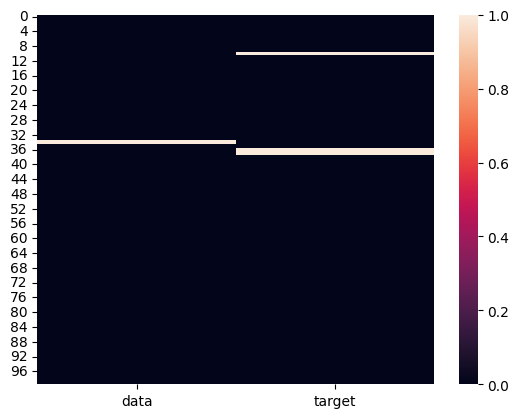

In [7]:
# Numerically find missing values
print(df['data'].isna().sum(), " --- ", df['target'].isna().sum())

# Graphically find missing values
sns.heatmap(df.isna())

0  ---  0


<Axes: >

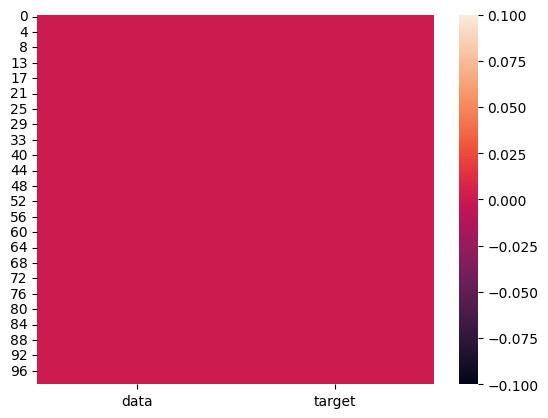

In [8]:
# Drop missing values
df.dropna(axis=0, inplace=True)

# Numerically find missing values
print(df['data'].isna().sum(), " --- ", df['target'].isna().sum())

# Graphically find missing values
sns.heatmap(df.isna())

(array([94.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-2.96686730e+00,  9.99963298e+04,  1.99995627e+05,  2.99994923e+05,
         3.99994220e+05,  4.99993517e+05,  5.99992813e+05,  6.99992110e+05,
         7.99991407e+05,  8.99990703e+05,  9.99990000e+05]),
 <BarContainer object of 10 artists>)

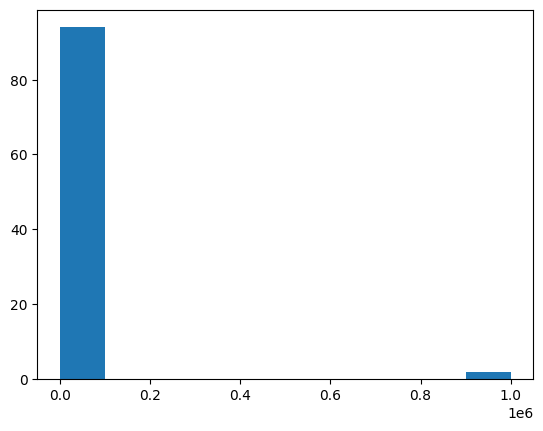

In [9]:
# Find outliers in X
plt.hist(df['data'])

In [10]:
df[df['data'] > 1000]

,data,target
75,999990.0,4.664488
88,999990.0,7.985459


(array([12., 20., 19., 14., 12.,  6.,  3.,  3.,  5.,  2.]),
 array([0.06839479, 1.05857576, 2.04875673, 3.0389377 , 4.02911867,
        5.01929964, 6.00948061, 6.99966158, 7.98984255, 8.98002352,
        9.97020449]),
 <BarContainer object of 10 artists>)

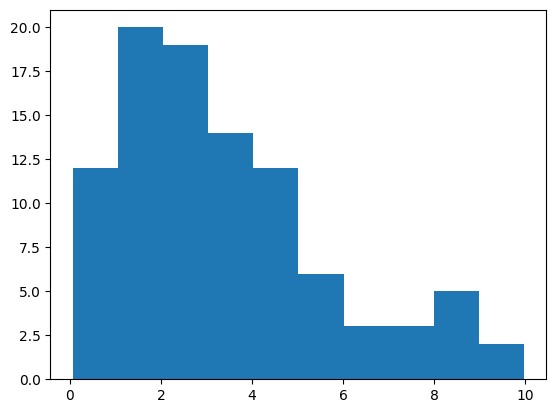

In [11]:
# Find outliers in y
plt.hist(df['target'])

(array([11., 15.,  6., 11.,  7.,  8.,  9., 11.,  7.,  9.]),
 array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162]),
 <BarContainer object of 10 artists>)

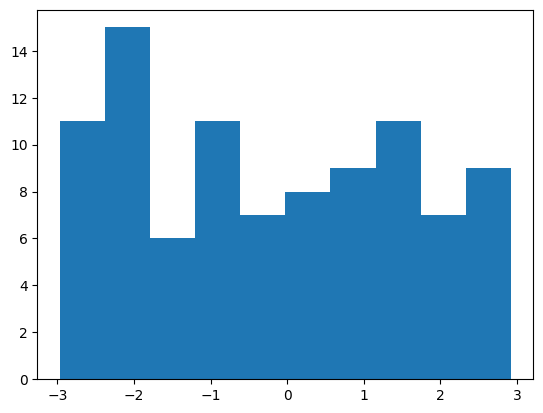

In [12]:
df = df[df['data'] < 0.2e6]
plt.hist(df['data'])

### Step 3 - Exploratory Data Analysis (EDA)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 94 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    94 non-null     float64
 1   target  94 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [14]:
df.describe()

,data,target
count,94.000000,94.000000
mean,-0.190637,3.310279
std,1.749446,2.285500
min,-2.966867,0.068395
25%,-1.820004,1.705357
50%,-0.215145,2.889826
75%,1.353095,4.324257
max,2.921322,9.970204


<Axes: xlabel='data'>

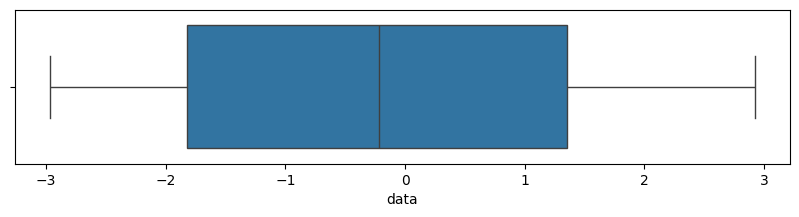

In [17]:
plt.figure(figsize=(10,2))
sns.boxplot(data=df, x='data')

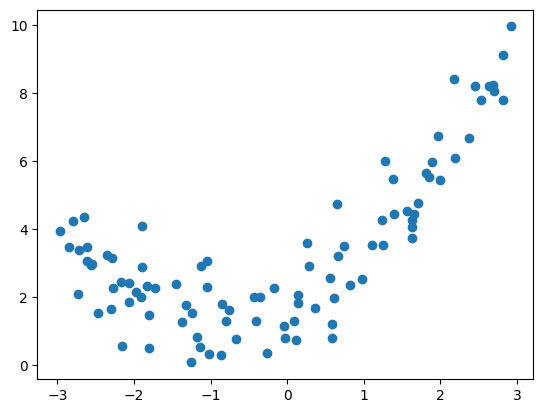

In [18]:
plt.scatter(df['data'], df['target'])

### Step 4 - Cross Validation

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['data'].values,df['target'].values,
                                                    test_size=0.20)

In [20]:
print(X_train.size)
X_train = X_train.reshape(-1,1)
X_train

75


array([[-0.16671045],
       [ 1.63346862],
       [ 1.24843547],
       [ 0.60669007],
       [-0.80182894],
       [ 1.56471029],
       [ 0.67111737],
       [ 1.24114406],
       [ 2.81945911],
       [-2.84748524],
       [-2.30478564],
       [-1.04801802],
       [ 2.45592241],
       [-0.75275929],
       [ 1.89276857],
       [ 1.99465584],
       [-0.35908504],
       [ 2.70428584],
       [-2.6186499 ],
       [ 1.62762208],
       [-2.55269614],
       [-2.9668673 ],
       [-1.31439294],
       [ 1.65079694],
       [-1.13410607],
       [ 1.71105577],
       [-2.06403288],
       [-1.9090502 ],
       [-0.26358009],
       [-0.43475389],
       [-1.04890007],
       [-1.44732011],
       [ 0.58739987],
       [-0.66793626],
       [ 1.62580308],
       [-1.80195731],
       [ 2.53124541],
       [-1.80770591],
       [ 2.3689641 ],
       [-1.25262516],
       [-1.37190581],
       [ 0.2561765 ],
       [ 1.85038409],
       [-2.60969044],
       [ 0.97513371],
       [-1

In [21]:
X_test.size

19

### Step 5 - Build and Train the Model

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
lin_reg.intercept_, lin_reg.coef_

(np.float64(1.8593749616756203), array([0.9454799 , 0.52882469]))

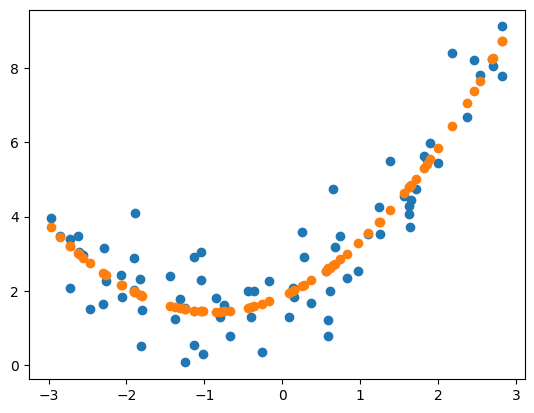

In [23]:
plt.scatter(X_train,y_train)
y_model = lin_reg.intercept_ + lin_reg.coef_[0]*X_train + lin_reg.coef_[1]*X_train**2
plt.scatter(X_train,y_model)

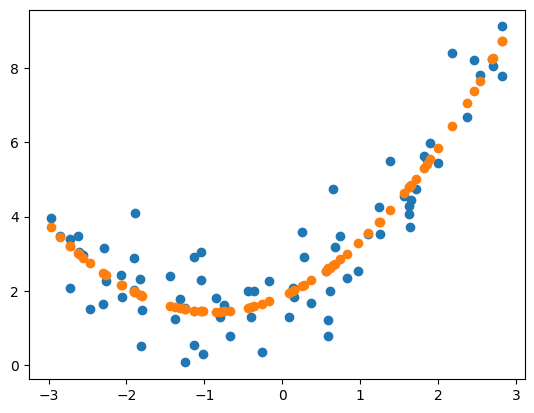

In [24]:
y_predict = lin_reg.predict(X_poly)
plt.scatter(X_train,y_train)
plt.scatter(X_train,y_predict)

### Step 6 - Evaluation

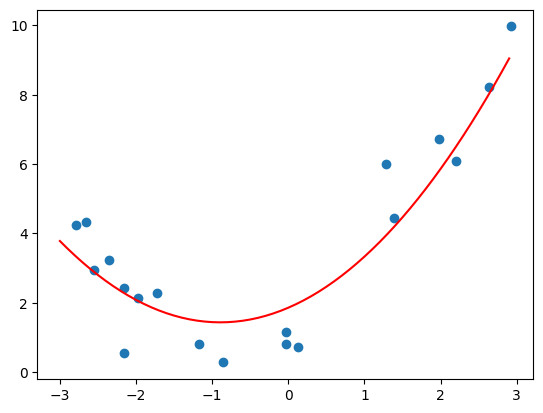

In [33]:
X_poly = poly_features.fit_transform(np.arange(-3,3,0.1).reshape(-1,1))
y_predict = lin_reg.predict(X_poly)
plt.scatter(X_test,y_test)
plt.plot(np.arange(-3,3,0.1),y_predict, color='red')

In [34]:
# Mean Squared Error

X_poly = poly_features.fit_transform(X_test.reshape(-1,1))
y_predict = lin_reg.predict(X_poly)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_predict)
print(f"Mean Squared Error: {mse}")

# R^2 Coefficient
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_predict)
print(f"R^2 Coefficient: {r2}")

Mean Squared Error: 0.8992961062291762
R^2 Coefficient: 0.8789639105590635


Is there a better degree to match the data?

Degree: 1 --- R^2 Coefficient: 0.8549276191484482
Degree: 2 --- R^2 Coefficient: 0.8549276191484482
Degree: 3 --- R^2 Coefficient: 0.8549276191484482
Degree: 4 --- R^2 Coefficient: 0.8549276191484482
Degree: 5 --- R^2 Coefficient: 0.8549276191484482
Degree: 6 --- R^2 Coefficient: 0.8549276191484482
Degree: 7 --- R^2 Coefficient: 0.8549276191484482
Degree: 8 --- R^2 Coefficient: 0.8549276191484482
Degree: 9 --- R^2 Coefficient: 0.8549276191484482
Degree: 10 --- R^2 Coefficient: 0.8549276191484482


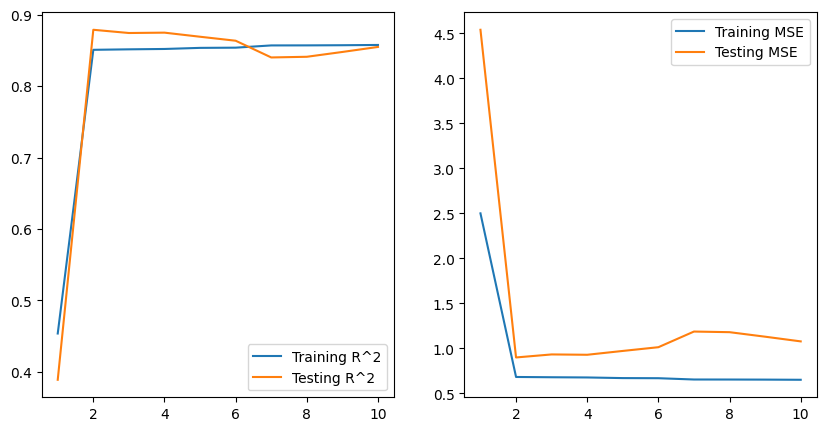

In [40]:
degrees = [1,2,3,4,5,6,7,8,9,10]
training_r2 = []
testing_r2 = []
training_mse = []
testing_mse = []

for deg in degrees:
  # Set up Polynomial Features
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly = poly_features.fit_transform(X_train.reshape(-1,1))
  # Set up model
  lin_reg = LinearRegression()
  lin_reg.fit(X_poly, y_train)
  # Make predictions for training data
  y_predict = lin_reg.predict(X_poly)
  training_mse.append(mean_squared_error(y_train, y_predict))
  training_r2.append(r2_score(y_train,y_predict))
  # Make predictions for testing data
  X_poly = poly_features.fit_transform(X_test.reshape(-1,1))
  y_predict = lin_reg.predict(X_poly)
  testing_mse.append(mean_squared_error(y_test, y_predict))
  testing_r2.append(r2_score(y_test, y_predict))
  print(f"Degree: {deg} --- R^2 Coefficient: {r2}")

fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(degrees, training_r2, label='Training R^2')
ax[0].plot(degrees, testing_r2, label='Testing R^2')
ax[1].plot(degrees, training_mse, label='Training MSE')
ax[1].plot(degrees, testing_mse, label='Testing MSE')
ax[0].legend()
ax[1].legend()

MSE decreases for the training data as degree increases. Likewise, R^2 for the training data increases as degree increases.

However, MSE increases for the testing data as degree increases. Likewise, R^2 for the testing data decreases as degree increases.

This indicates overfitting if the degree is above 2.

So, the ideal degree is 2.